<a href="https://colab.research.google.com/github/hoangchaugiahan/CNN/blob/main/FACES_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

train_face = '/content/drive/MyDrive/faces'
val_face = '/content/drive/MyDrive/faces'
train_emotion = '/content/drive/MyDrive/emotion'
val_emotion = '/content/drive/MyDrive/emotion'
IMG_SIZE = 224
EMO_SIZE = 96

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.5,1.0],
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_face = train_datagen.flow_from_directory(
    train_face,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)
val_generator_face = val_datagen.flow_from_directory(
    val_face,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

train_generator_emotion = train_datagen.flow_from_directory(
    train_emotion,
    target_size=(EMO_SIZE, EMO_SIZE),
    class_mode='categorical'
)
val_generator_emotion = val_datagen.flow_from_directory(
    val_emotion,
    target_size=(EMO_SIZE, EMO_SIZE),
    class_mode='categorical'
)


Found 49 images belonging to 5 classes.
Found 49 images belonging to 5 classes.
Found 104 images belonging to 10 classes.
Found 104 images belonging to 10 classes.


In [4]:


model_face = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator_face.num_classes, activation='softmax')
])


model_emotion = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(EMO_SIZE, EMO_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator_emotion.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

model_face.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_face = model_face.fit(
    train_generator_face,
    steps_per_epoch=len(train_generator_face),
    epochs=50,
    validation_data=val_generator_face,
    validation_steps=len(val_generator_face)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step - accuracy: 0.0857 - loss: 2.6707 - val_accuracy: 0.2245 - val_loss: 2.7722
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.3021 - loss: 1.8931 - val_accuracy: 0.2449 - val_loss: 1.6561
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.2221 - loss: 1.6798 - val_accuracy: 0.2449 - val_loss: 1.5932
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2466 - loss: 1.6054 - val_accuracy: 0.3061 - val_loss: 1.5383
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.2362 - loss: 1.5678 - val_accuracy: 0.4082 - val_loss: 1.4630
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3939 - loss: 1.4951 - val_accuracy: 0.5714 - val_loss: 1.3701
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.4179 - loss: 1.4946 - val_accuracy: 0.4082 - val_loss: 1.3365
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.2809 - loss: 1.4261 - val_accuracy: 0.4694 - val_loss: 1.2252
Epoch 9/50
2/2

In [37]:

model_emotion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_emotion = model_emotion.fit(
    train_generator_emotion,
    steps_per_epoch=len(train_generator_emotion),
    epochs=90,
    validation_data=val_generator_emotion,
    validation_steps=len(val_generator_emotion)
)

Epoch 1/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 996ms/step - accuracy: 0.4327 - loss: 1.6245 - val_accuracy: 0.3365 - val_loss: 1.8368
Epoch 2/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - accuracy: 0.2772 - loss: 1.7154 - val_accuracy: 0.5000 - val_loss: 1.2971
Epoch 3/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 655ms/step - accuracy: 0.4401 - loss: 1.5079 - val_accuracy: 0.5000 - val_loss: 1.1810
Epoch 4/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 580ms/step - accuracy: 0.4690 - loss: 1.3948 - val_accuracy: 0.6058 - val_loss: 1.1709
Epoch 5/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 576ms/step - accuracy: 0.5136 - loss: 1.3105 - val_accuracy: 0.6154 - val_loss: 1.1652
Epoch 6/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step - accuracy: 0.5428 - loss: 1.2066 - val_accuracy: 0.6058 - val_loss: 1.0907
Epoch 7/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 541ms/step - accuracy: 0.5738 - loss: 1.1871 - val_accuracy: 0.6154 - val_loss: 1.0473
Epoch 8/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 682ms/step - accuracy: 0.5411 - loss: 1.2440 - val_accuracy: 0.6538 - val_loss:

In [38]:

model_face.save('/content/drive/MyDrive/faces.keras')
model_emotion.save('/content/drive/MyDrive/emotions.keras')

class_labels_face = list(train_generator_face.class_indices.keys())
class_labels_emotion = list(train_generator_emotion.class_indices.keys())


In [39]:
def predict_single_image(img_path, model_face, model_emotion, class_labels_face, class_labels_emotion):

    img_face = load_img(img_path, target_size=(224, 224))
    img_array_face = img_to_array(img_face) / 255.0
    img_array_face = img_array_face.reshape(1, 224, 224, 3)
    prediction_face = model_face.predict(img_array_face, verbose=0)
    class_idx_face = np.argmax(prediction_face)
    predicted_face = class_labels_face[class_idx_face]

    img_emotion = load_img(img_path, target_size=(96, 96))
    img_array_emotion = img_to_array(img_emotion) / 255.0
    img_array_emotion = img_array_emotion.reshape(1, 96, 96, 3)
    prediction_emotion = model_emotion.predict(img_array_emotion, verbose=0)
    class_idx_emotion = np.argmax(prediction_emotion)
    predicted_emotion = class_labels_emotion[class_idx_emotion]

    plt.imshow(img_face)
    plt.axis('off')
    plt.title(f'Người: {predicted_face} | Cảm xúc: {predicted_emotion}')
    plt.show()

    return predicted_face, predicted_emotion


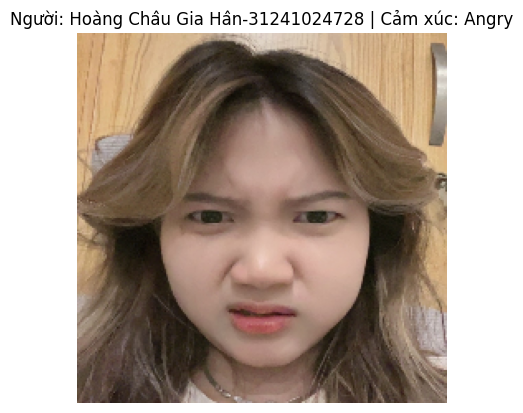

Người này là: Hoàng Châu Gia Hân-31241024728
Người này đang cảm thấy: Angry


In [45]:
img_path = '/content/drive/MyDrive/emotion (1)/Angry/IMG_8924.JPG'


from keras.utils import load_img, img_to_array
import numpy as np

predicted_face, predicted_emotion = predict_single_image(img_path, model_face, model_emotion, class_labels_face, class_labels_emotion)

print(f"Người này là: {predicted_face}")
print(f"Người này đang cảm thấy: {predicted_emotion}")

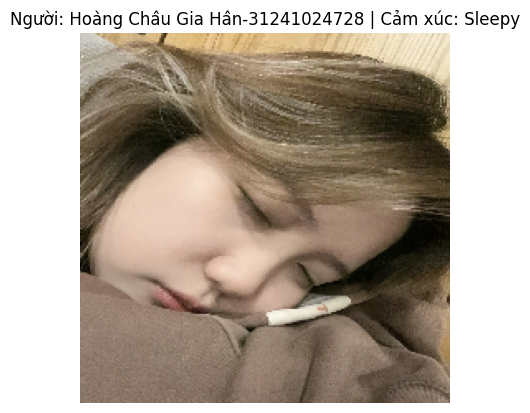

Người này là: Hoàng Châu Gia Hân-31241024728
Người này đang cảm thấy: Sleepy


In [42]:
img_path = '/content/drive/MyDrive/emotion (1)/Sleepy/IMG_8935.JPG'


from keras.utils import load_img, img_to_array
import numpy as np

predicted_face, predicted_emotion = predict_single_image(img_path, model_face, model_emotion, class_labels_face, class_labels_emotion)

print(f"Người này là: {predicted_face}")
print(f"Người này đang cảm thấy: {predicted_emotion}")

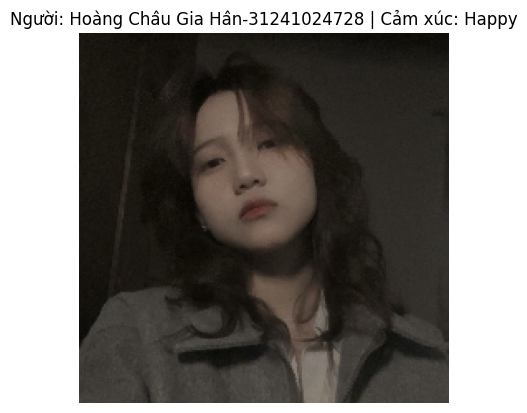

Người này là: Hoàng Châu Gia Hân-31241024728
Người này đang cảm thấy: Happy


In [52]:
img_path = '/content/drive/MyDrive/faces/Hoàng Châu Gia Hân-31241024728/IMG_8550.JPG'


from keras.utils import load_img, img_to_array
import numpy as np

predicted_face, predicted_emotion = predict_single_image(img_path, model_face, model_emotion, class_labels_face, class_labels_emotion)

print(f"Người này là: {predicted_face}")
print(f"Người này đang cảm thấy: {predicted_emotion}")

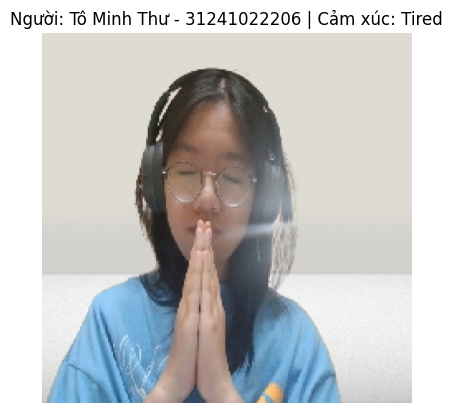

Người này là: Tô Minh Thư - 31241022206
Người này đang cảm thấy: Tired


In [66]:
img_path = '/content/drive/MyDrive/faces/Tô Minh Thư - 31241022206/6.png'


from keras.utils import load_img, img_to_array
import numpy as np

predicted_face, predicted_emotion = predict_single_image(img_path, model_face, model_emotion, class_labels_face, class_labels_emotion)

print(f"Người này là: {predicted_face}")
print(f"Người này đang cảm thấy: {predicted_emotion}")

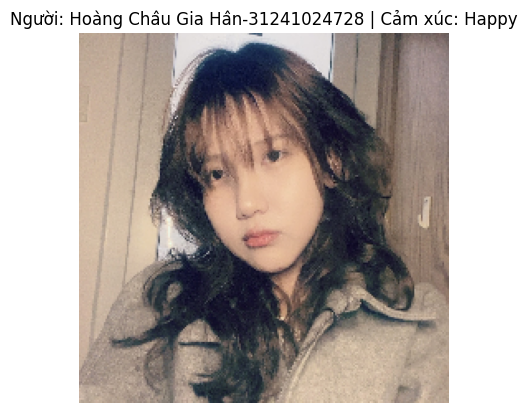

Người này là: Hoàng Châu Gia Hân-31241024728
Người này đang cảm thấy: Happy


In [78]:
img_path = '/content/drive/MyDrive/faces/Hoàng Châu Gia Hân-31241024728/IMG_8551.JPG'


from keras.utils import load_img, img_to_array
import numpy as np

predicted_face, predicted_emotion = predict_single_image(img_path, model_face, model_emotion, class_labels_face, class_labels_emotion)

print(f"Người này là: {predicted_face}")
print(f"Người này đang cảm thấy: {predicted_emotion}")

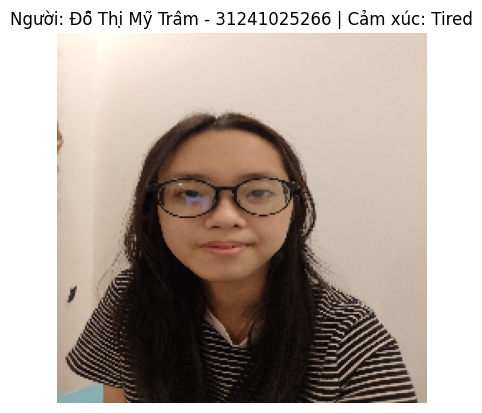

Người này là: Đỗ Thị Mỹ Trâm - 31241025266
Người này đang cảm thấy: Tired


In [90]:
img_path = '/content/drive/MyDrive/faces/Đỗ Thị Mỹ Trâm - 31241025266/5.jpg'


from keras.utils import load_img, img_to_array
import numpy as np

predicted_face, predicted_emotion = predict_single_image(img_path, model_face, model_emotion, class_labels_face, class_labels_emotion)

print(f"Người này là: {predicted_face}")
print(f"Người này đang cảm thấy: {predicted_emotion}")

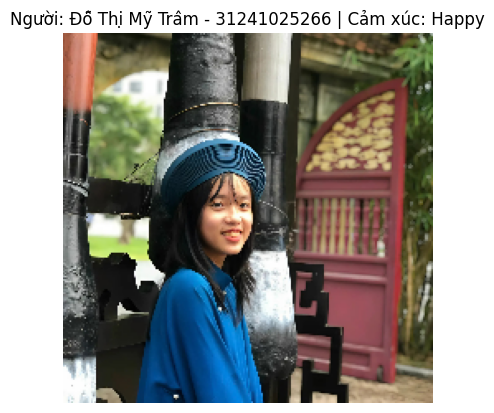

Người này là: Đỗ Thị Mỹ Trâm - 31241025266
Người này đang cảm thấy: Happy


In [63]:
img_path = '/content/drive/MyDrive/faces/Đỗ Thị Mỹ Trâm - 31241025266/1.jpg'


from keras.utils import load_img, img_to_array
import numpy as np

predicted_face, predicted_emotion = predict_single_image(img_path, model_face, model_emotion, class_labels_face, class_labels_emotion)

print(f"Người này là: {predicted_face}")
print(f"Người này đang cảm thấy: {predicted_emotion}")